In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
data = pd.read_csv("/content/fraud detection.csv")
df=pd.DataFrame(data)

In [4]:
df.head()

,ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1
1,2,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
2,3,40,CASH_OUT,94684.22,C999271610,0.00,0.00,C269348569,100443.55,195127.77,0
3,4,139,CASH_OUT,61572.27,C2098314951,416524.00,354951.73,C1093723175,126019.53,187591.80,0
4,5,526,TRANSFER,682901.78,C50452950,0.00,0.00,C2102114319,748928.26,1431830.04,0


In [5]:
data.head(10)

,ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1
1,2,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
2,3,40,CASH_OUT,94684.22,C999271610,0.00,0.00,C269348569,100443.55,195127.77,0
3,4,139,CASH_OUT,61572.27,C2098314951,416524.00,354951.73,C1093723175,126019.53,187591.80,0
4,5,526,TRANSFER,682901.78,C50452950,0.00,0.00,C2102114319,748928.26,1431830.04,0
5,6,187,TRANSFER,142740.15,C1405714095,0.00,0.00,C1378055562,246634.60,389374.75,0
6,7,398,TRANSFER,4309298.47,C668700925,4309298.47,0.00,C1360905880,0.00,0.00,1
7,8,306,CASH_IN,147790.37,C128950954,499682.00,647472.37,C1911802090,3564911.28,3417120.91,0
8,9,204,CASH_OUT,170956.09,C1917381506,0.00,0.00,C538563383,1038699.65,1209655.74,0
9,10,163,CASH_OUT,28810.69,C204552268,49544.00,20733.31,C406232323,73381.08,102191.77,0


In [6]:
df.shape #dimension of data frame

(18213, 11)

In [7]:
df.tail() #printing last 5 rows in dataset

,ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
18208,18209,108,TRANSFER,99808.45,C1704281751,99808.45,0.00,C587386073,0.00,0.00,1
18209,18210,173,TRANSFER,176273.29,C386692409,176273.29,0.00,C1025742188,0.00,0.00,1
18210,18211,347,PAYMENT,5854.11,C373113411,246233.85,240379.74,M312851300,0.00,0.00,0
18211,18212,380,CASH_OUT,87317.28,C413020159,140221.23,52903.95,C495945638,164096.85,251414.13,0
18212,18213,522,TRANSFER,1752606.15,C1333169684,1752606.15,0.00,C722968916,0.00,0.00,1


In [10]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18213 non-null  int64  
 1   step            18213 non-null  int64  
 2   type            18213 non-null  object 
 3   amount          18213 non-null  float64
 4   nameOrig        18213 non-null  object 
 5   oldbalanceOrg   18213 non-null  float64
 6   newbalanceOrig  18213 non-null  float64
 7   nameDest        18213 non-null  object 
 8   oldbalanceDest  18213 non-null  float64
 9   newbalanceDest  18213 non-null  float64
 10  isFraud         18213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [11]:
df.describe()

,ID,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,18213.000000,18213.000000,1.821300e+04,1.821300e+04,1.821300e+04,1.821300e+04,1.821300e+04,18213.000000
mean,9107.000000,300.244441,7.624918e+05,1.200076e+06,5.546390e+05,8.655575e+05,1.269872e+06,0.450942
std,5257.784562,190.009780,1.824941e+06,3.222081e+06,2.551140e+06,3.286398e+06,3.738408e+06,0.497601
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4554.000000,161.000000,3.266058e+04,7.087000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9107.000000,280.000000,1.593057e+05,1.001090e+05,0.000000e+00,0.000000e+00,1.422921e+05,0.000000
75%,13660.000000,402.000000,4.753156e+05,6.991836e+05,0.000000e+00,5.530399e+05,1.107620e+06,1.000000
max,18213.000000,743.000000,5.199086e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [12]:
#checking if there are null values in the data

df.isnull().sum()

ID                0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [18]:

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<ipython-input-20-8682b85edab0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='Set3')


<Axes: xlabel='type', ylabel='count'>

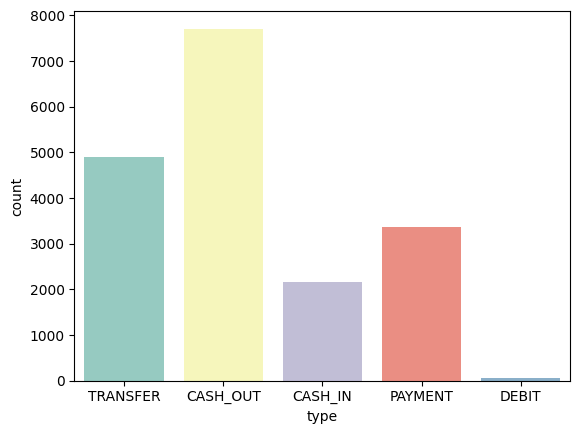

In [20]:
# sns.countplot(x='type', data=data)
sns.countplot(x='type', data=data, palette='Set3')

In [13]:
# value counts of "IsFraud" column

df["isFraud"].value_counts()

0    10000
1     8213
Name: isFraud, dtype: int64

In [14]:
df["type"].value_counts()

CASH_OUT    7710
TRANSFER    4902
PAYMENT     3368
CASH_IN     2170
DEBIT         63
Name: type, dtype: int64

In [15]:
fraud_percentage_by_type=df.groupby('type')['isFraud'].mean()*100

In [16]:
fraud_percentage_by_type

type
CASH_IN      0.000000
CASH_OUT    53.385214
DEBIT        0.000000
PAYMENT      0.000000
TRANSFER    83.578131
Name: isFraud, dtype: float64

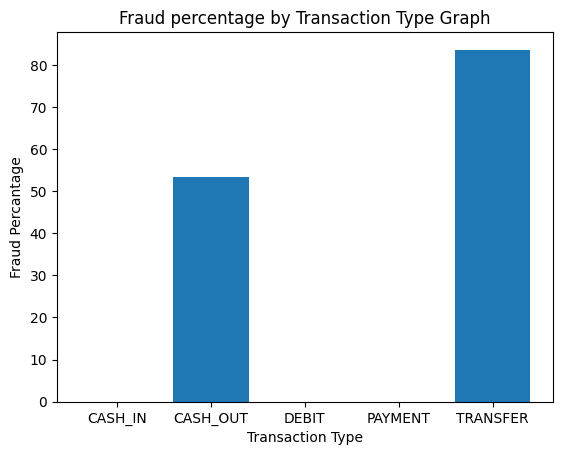

In [17]:
#plotting bar graph by transaction type

plt.bar(fraud_percentage_by_type.index,fraud_percentage_by_type.values)
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Percantage")
plt.title("Fraud percentage by Transaction Type Graph")
plt.show()

In [21]:
#Removing entries in which there is no fraud

data = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER'])]
print('The new data now has ', len(data), ' transactions.')

The new data now has  12612  transactions.


In [22]:
print('Number of transactions where the transaction amount is negative: ' + str(sum(data['amount'] < 0)))


Number of transactions where the transaction amount is negative: 0


In [23]:
print('Number of transactions where the transaction amount is equal to zero: ' +
str(sum(data['amount'] == 0)))

Number of transactions where the transaction amount is equal to zero: 16


Percentage of transactions where originator's initial balance is 0: 16.60%


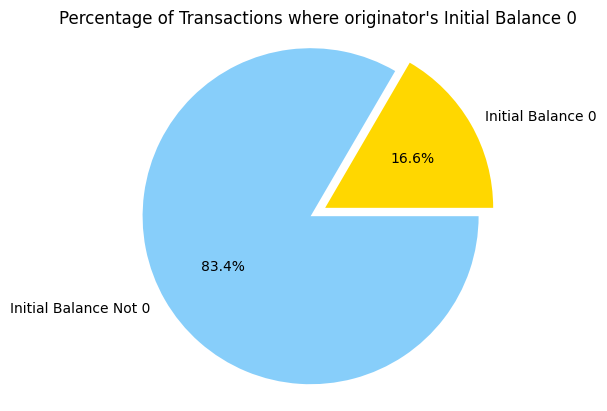

In [28]:
import matplotlib.pyplot as plt

# Calculate the number of transactions where the originator's initial balance is 0
no_Ofzero = sum(data['oldbalanceOrg'] == 0)

# Total number of transactions
total = len(data['oldbalanceOrg'])

# Calculate the percentage
percentage = (no_Ofzero / total) * 100

print(f"Percentage of transactions where originator's initial balance is 0: {percentage:.2f}%")

# Pie chart
labels = ['Initial Balance 0', 'Initial Balance Not 0']
sizes = [percentage, 100 - percentage]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Transactions where originator's Initial Balance 0")
plt.show()


Percentage of transactions where Destination's Final balance is 0: 32.56%


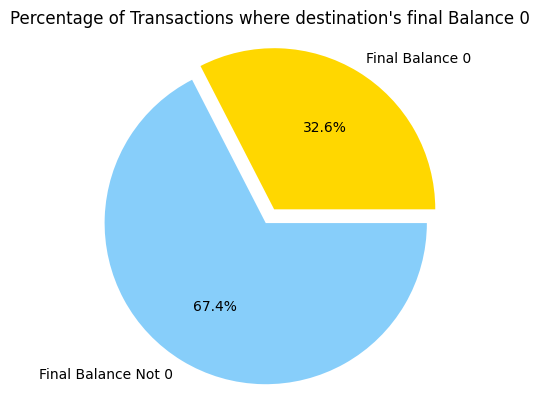

In [27]:
import matplotlib.pyplot as plt

# Calculate the number of transactions where the Destination's Final balance is 0
no_Ofzero = sum(data['newbalanceDest'] == 0)

# Total number of transactions
total = len(data['newbalanceDest'])

# Calculate the percentage
percentage = (no_Ofzero / total) * 100

print(f"Percentage of transactions where Destination's Final balance is 0: {percentage:.2f}%")

# Pie chart
labels = ['Final Balance 0', 'Final Balance Not 0']
sizes = [percentage, 100 - percentage]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Transactions where destination's final Balance 0")
plt.show()

8213
41
percentage of fraudulent transactions where initial balance of originator is 0: 0.50


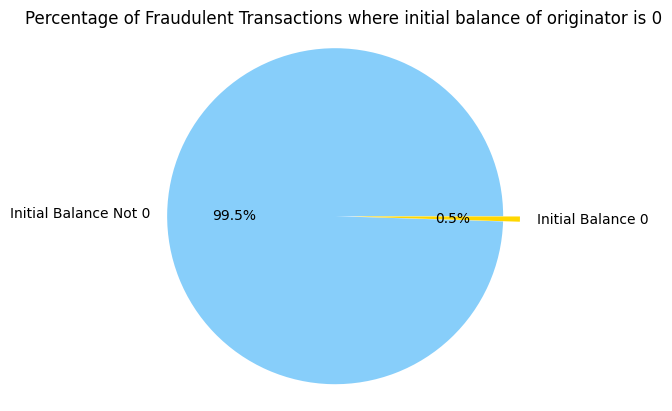

In [33]:
#Percentage of Fraudulent Transactions where initial balance of originator is 0
#for fraudulant data
# Count the total number of fraudulent transactions
fraud_count = sum(data['isFraud'] == 1)

# Count the number of fraudulent transactions where the initial balance of the originator is 0
value_count = sum((data['isFraud'] == 1) & (data['oldbalanceOrg'] == 0))

# Calculate the percentage
percentage = (value_count / fraud_count) * 100
print(fraud_count)
print(value_count)
print(f"percentage of fraudulent transactions where initial balance of originator is 0: {percentage:.2f}")

labels = ["Initial Balance Not 0", "Initial Balance 0"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Initial Balance 0" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Fraudulent Transactions where initial balance of originator is 0")

# Display the plot
plt.show()


4399
2053
percentage of non-fraudulent transactions where initial balance of originator is 0: 46.67


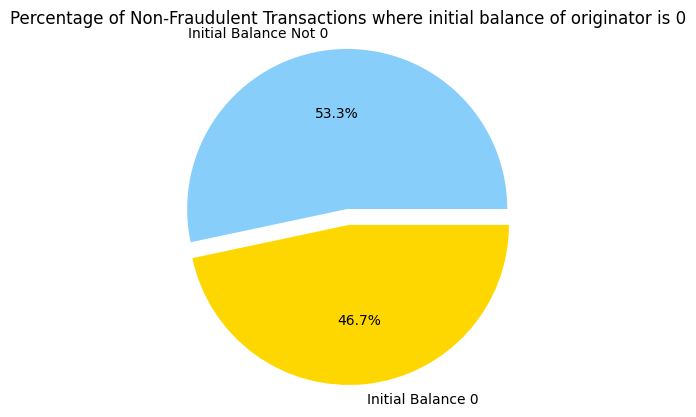

In [34]:
# Count the total number of non-fraudulent transactions
non_fraud_count = sum(data['isFraud'] == 0)
print(non_fraud_count)

# Count the number of non-fraudulent transactions where the initial balance of the originator is 0
value_count = sum((data['isFraud'] == 0) & (data['oldbalanceOrg'] == 0))
print(value_count)

# Calculate the percentage
percentage = (value_count / non_fraud_count) * 100


print(f"percentage of non-fraudulent transactions where initial balance of originator is 0: {percentage:.2f}")

labels = ["Initial Balance Not 0", "Initial Balance 0"]
sizes = [100 - percentage, percentage]
colors = ['lightskyblue', 'gold']
explode = (0, 0.1)  # Explode the "Initial Balance 0" slice

# Create pie plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Percentage of Non-Fraudulent Transactions where initial balance of originator is 0")

# Display the plot
plt.show()


In [36]:
#Drop 'nameOrig', 'nameDest','isFraud','step' columns
data1 = data.drop(['nameOrig', 'nameDest','step'], axis=1)
print(data1.head())
len(data1)

   ID      type       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   1  TRANSFER    321307.31      321307.31            0.00            0.00   
1   2  TRANSFER  10000000.00    27670038.08     17670038.08            0.00   
2   3  CASH_OUT     94684.22           0.00            0.00       100443.55   
3   4  CASH_OUT     61572.27      416524.00       354951.73       126019.53   
4   5  TRANSFER    682901.78           0.00            0.00       748928.26   

   newbalanceDest  isFraud  
0            0.00        1  
1            0.00        1  
2       195127.77        0  
3       187591.80        0  
4      1431830.04        0  


12612

In [37]:
#Data splitting process

from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data1,test_size=0.3,random_state=21)
print("len of train data",len(train_data))
print("len of test data",len(test_data))

len of train data 8828
len of test data 3784


In [38]:
print(train_data.shape,test_data.shape)

(8828, 8) (3784, 8)


In [39]:
train_data.head()

,ID,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
7575,7576,CASH_OUT,1499869.54,1499869.54,0.0,9546574.32,11046443.85,1
3524,3525,CASH_OUT,332620.50,0.00,0.0,392571.85,725192.36,0
151,152,CASH_OUT,304239.63,0.00,0.0,1354030.00,1658269.63,0
9253,9254,CASH_OUT,219178.49,219178.49,0.0,0.00,219178.49,1
4993,4994,CASH_OUT,100777.35,29628.00,0.0,50240.07,151017.42,0


In [40]:
test_data.head()

,ID,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
16862,16863,TRANSFER,1547855.00,0.00,0.0,3836303.49,5384158.49,0
7092,7093,CASH_OUT,73946.79,73946.79,0.0,518296.65,592243.44,1
10675,10676,TRANSFER,178503.45,178503.45,0.0,0.00,0.00,1
9625,9626,CASH_OUT,424962.90,424962.90,0.0,322327.23,747290.13,1
9986,9987,TRANSFER,73486.80,73486.80,0.0,0.00,0.00,1


In [41]:
train_data.columns

Index(['ID', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [42]:
#training data
x_train=train_data.drop(["isFraud"],axis=1)
y_train=train_data["isFraud"]

In [43]:
#testing data
x_test=test_data.drop("isFraud",axis=1)
y_test=test_data["isFraud"]

In [45]:
print(y_train)
print(type(y_train))

7575     1
3524     0
151      0
9253     1
4993     0
        ..
13550    1
72       1
13002    1
8569     0
7685     1
Name: isFraud, Length: 8828, dtype: int64
<class 'pandas.core.series.Series'>


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#numerical features
num_feats=x_train.drop("type",axis=1)
num_feats_pipe=Pipeline([
    ("scalar",MinMaxScaler())
    ])
num_feats_preprocessed=num_feats_pipe.fit_transform(num_feats)

#catagorical features
cat_feats=x_train[["type"]]
cat_feats_pipe=Pipeline([
    ("encoder",OneHotEncoder())
    ])
cat_feats_preprocessed=cat_feats_pipe.fit_transform(cat_feats)
print(num_feats)

          ID      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
7575    7576  1499869.54     1499869.54             0.0      9546574.32   
3524    3525   332620.50           0.00             0.0       392571.85   
151      152   304239.63           0.00             0.0      1354030.00   
9253    9254   219178.49      219178.49             0.0            0.00   
4993    4994   100777.35       29628.00             0.0        50240.07   
...      ...         ...            ...             ...             ...   
13550  13551   541486.74      541486.74             0.0            0.00   
72        73     9131.00        9131.00             0.0            0.00   
13002  13003   154196.49      154196.49             0.0            0.00   
8569    8570   175725.71      107610.26             0.0       191559.79   
7685    7686    64344.59       64344.59             0.0            0.00   

       newbalanceDest  
7575      11046443.85  
3524        725192.36  
151        1658269.63  
925

In [47]:
from sklearn.compose import ColumnTransformer
num_list=list(num_feats)
cat_list=list(cat_feats)

final_pipeline=ColumnTransformer([
    ("num",num_feats_pipe,num_list),
    ("cat",cat_feats_pipe,cat_list)])
X_train_preprocessed=final_pipeline.fit_transform(x_train)
print(x_train)
X_train_preprocessed

X_test_preprocessed = final_pipeline.fit_transform(x_test)
X_test_preprocessed

          ID      type      amount  oldbalanceOrg  newbalanceOrig  \
7575    7576  CASH_OUT  1499869.54     1499869.54             0.0   
3524    3525  CASH_OUT   332620.50           0.00             0.0   
151      152  CASH_OUT   304239.63           0.00             0.0   
9253    9254  CASH_OUT   219178.49      219178.49             0.0   
4993    4994  CASH_OUT   100777.35       29628.00             0.0   
...      ...       ...         ...            ...             ...   
13550  13551  TRANSFER   541486.74      541486.74             0.0   
72        73  TRANSFER     9131.00        9131.00             0.0   
13002  13003  TRANSFER   154196.49      154196.49             0.0   
8569    8570  CASH_OUT   175725.71      107610.26             0.0   
7685    7686  TRANSFER    64344.59       64344.59             0.0   

       oldbalanceDest  newbalanceDest  
7575       9546574.32     11046443.85  
3524        392571.85       725192.36  
151        1354030.00      1658269.63  
9253       

array([[9.25923892e-01, 2.97716748e-02, 0.00000000e+00, ...,
        2.27442158e-02, 0.00000000e+00, 1.00000000e+00],
       [3.89434957e-01, 1.42230363e-03, 1.46722601e-03, ...,
        2.50180463e-03, 1.00000000e+00, 0.00000000e+00],
       [5.86184174e-01, 3.43336208e-03, 3.54180222e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [5.23694470e-01, 3.76627578e-03, 2.72763105e-04, ...,
        6.85671645e-03, 1.00000000e+00, 0.00000000e+00],
       [1.85821756e-01, 2.83185598e-03, 2.92129801e-03, ...,
        6.21944029e-04, 1.00000000e+00, 0.00000000e+00],
       [7.53445720e-01, 4.15459461e-03, 4.28581434e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [48]:
#logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
log_model=model.fit(X_train_preprocessed,y_train)


In [50]:
y_train_pred = log_model.predict(X_train_preprocessed)
y_train_pred


array([0, 1, 0, ..., 1, 1, 1])

In [51]:
y_test_pred=log_model.predict(X_test_preprocessed)
y_test_pred

array([1, 0, 1, ..., 0, 1, 1])

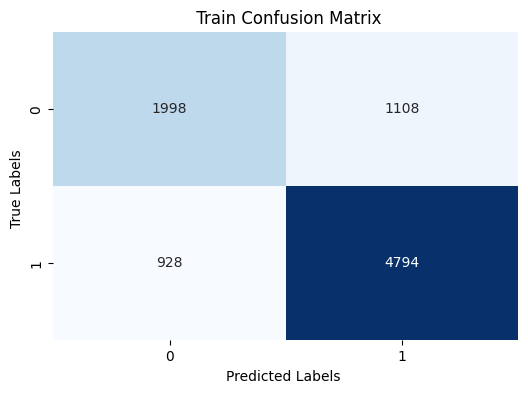

In [52]:
#Train Confusion Matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()

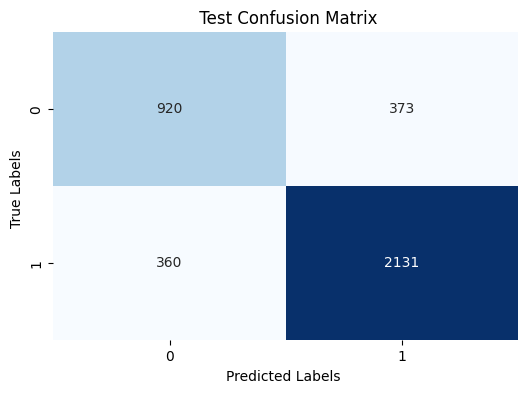

In [53]:
#Test Confusion Matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()

In [54]:
#F1 score of train and test

from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred)
print("F1 Score of test data:", f2)

F1 Score of train data: 0.8248451479697179
F1 Score of test data: 0.8532532532532533


In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)

In [57]:
print(report)

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1293
           1       0.85      0.86      0.85      2491

    accuracy                           0.81      3784
   macro avg       0.78      0.78      0.78      3784
weighted avg       0.81      0.81      0.81      3784



In [59]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [68]:
#performance metrics for training using logistic regression

print('Accuracy Score : ' + str(accuracy_score(y_train,y_train_pred)))
print('Precision Score : ' + str(precision_score(y_train,y_train_pred)))
print('Recall Score : ' + str(recall_score(y_train,y_train_pred)))
print('F1 Score : ' + str(f1_score(y_train,y_train_pred)))

Accuracy Score : 0.7693701857725419
Precision Score : 0.812267028126059
Recall Score : 0.8378189444250262
F1 Score : 0.8248451479697179


In [60]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_test_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_test_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_test_pred)))

Accuracy Score : 0.8062896405919662
Precision Score : 0.8510383386581469
Recall Score : 0.8554797270172622
F1 Score : 0.8532532532532533


In [61]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)

# Train the model on your training data
rf_model.fit(X_train_preprocessed,y_train)

# Make predictions on your testing data
y_test_pred_rf = rf_model.predict(X_test_preprocessed)

In [62]:
# Make predictions on training data
y_train_pred_rf = rf_model.predict(X_train_preprocessed)
y_train_pred_rf
y_test_pred_rf

array([0, 1, 1, ..., 0, 1, 1])

In [63]:
#F1 score of train and test
from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred_rf)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred_rf)
print("F1 Score of test data:", f2)

F1 Score of train data: 1.0
F1 Score of test data: 0.9722222222222223


In [67]:
#performance metrics for training using random forest

print('Accuracy Score : ' + str(accuracy_score(y_train,y_train_pred_rf)))
print('Precision Score : ' + str(precision_score(y_train,y_train_pred_rf)))
print('Recall Score : ' + str(recall_score(y_train,y_train_pred_rf)))
print('F1 Score : ' + str(f1_score(y_train,y_train_pred_rf)))

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [64]:
#performance metrics for testing using random forest
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_pred_rf)))
print('Precision Score : ' + str(precision_score(y_test,y_test_pred_rf)))
print('Recall Score : ' + str(recall_score(y_test,y_test_pred_rf)))
print('F1 Score : ' + str(f1_score(y_test,y_test_pred_rf)))

Accuracy Score : 0.9624735729386892
Precision Score : 0.9481114078595956
Recall Score : 0.997591328783621
F1 Score : 0.9722222222222223


In [69]:
report = classification_report(y_test, y_test_pred_rf)

In [70]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1293
           1       0.95      1.00      0.97      2491

    accuracy                           0.96      3784
   macro avg       0.97      0.95      0.96      3784
weighted avg       0.96      0.96      0.96      3784

